In [47]:
import os
os.getcwd()

'/home/jovyan/work/ICSME2021'

In [48]:
os.chdir("/home/jovyan/work/ICSME2021")

In [49]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import dates

In [50]:
androidListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/androidSamples.csv", index_col=0, skiprows=0)
awsListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/awsSamples.csv", index_col=0, skiprows=0)
azureListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/azureSamples.csv", index_col=0, skiprows=0)
springListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/springSamples.csv", index_col=0, skiprows=0)

In [51]:
def loadMetrics(listSamples):
    metrics = dict()
    for sample in listSamples.index.values:
        metrics[sample] = pd.read_csv(f"3-DataMerge/1-CodeSampleAgregation/{sample}.csv", index_col=[0,1], na_filter=False, infer_datetime_format=False)
        dateframe = pd.DataFrame(metrics[sample].index.values.tolist(), columns=['year','month'])
        dateframe["day"] = 1
        dataframe = pd.to_datetime(dateframe)
        metrics[sample].set_index(dataframe, inplace=True)
    return metrics

In [52]:
androidMetrics = loadMetrics(androidListSamples)
awsMetrics = loadMetrics(awsListSamples)
azureMetrics = loadMetrics(azureListSamples)
springMetrics = loadMetrics(springListSamples)

In [53]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':25,
         'xtick.labelsize': 25,
         'axes.labelsize': 25,
         'ytick.labelsize':25,
          'lines.linewidth': 3
         }
plt.rcParams.update(params)

In [66]:
def plotSourceCodeMetrics(sample, dataset):
    subplot = dataset["PL"].plot(legend=True)
    subplot = dataset["LOC"].plot(legend=True)
    subplot = dataset["CLOC"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("Source code")
    subplot.set_xlabel("Time")
#     subplot.set_title(f"Code size")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}",bbox_inches = 'tight')    

2 - Source code readability

In [67]:
def plotReadability(sample, dataset):
    subplot = dataset["Readability"].plot(legend=True)
#     subplot = dataset["questions"].plot(legend=True)
#     subplot.set_title(f"Source code readability")
    subplot.set_ylabel("Readability")
    subplot.set_xlabel("Time")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}",bbox_inches = 'tight')

3 - Project size

In [68]:
def plotProjectSizeMetrics(sample, dataset):
    subplot = dataset["Java"].plot(legend=True)
    subplot = dataset["Classes"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
#     subplot.set_title(f"Project size")
    subplot.set_xlabel("Time")
    subplot.set_ylabel("Project size")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}",bbox_inches = 'tight')

4 - OO Metrics

In [69]:
def plotOOMetrics(sample, dataset):
    subplot = dataset["WMC"].plot(legend=True)     
    subplot = dataset["RFC"].plot(legend=True)
    subplot = dataset["DIT"].plot(legend=True)
    subplot = dataset["CBO"].plot(legend=True)
    subplot = dataset["NOC"].plot(legend=True)
    subplot = dataset["LCOM"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("OO metrics")
    subplot.set_xlabel("Time")
#     subplot.set_title(f"OO metrics")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}",bbox_inches = 'tight')

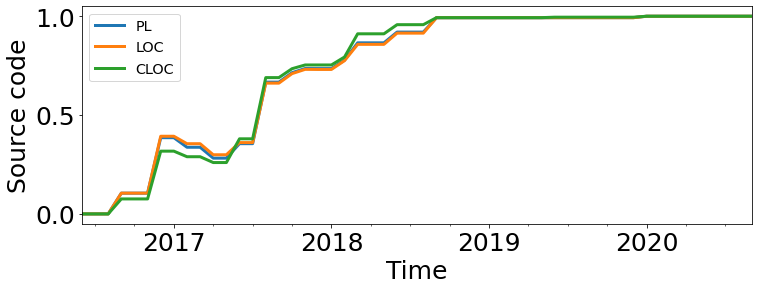

In [70]:
plotSourceCodeMetrics("sourceCodeSizeExample.pdf", azureMetrics["Azure-Samples/compute-java-manage-vm"])

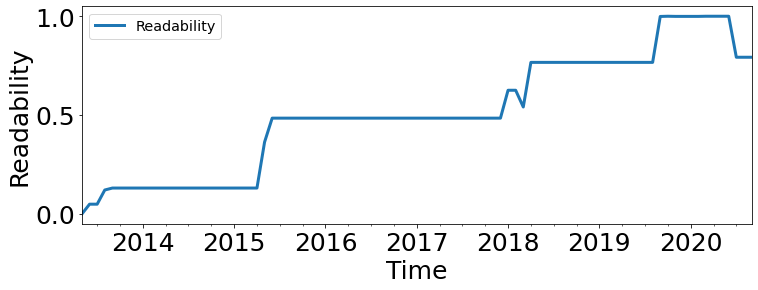

In [71]:
plotReadability("sourceCodeReadabilityExample.pdf", springMetrics["spring-guides/gs-batch-processing"])

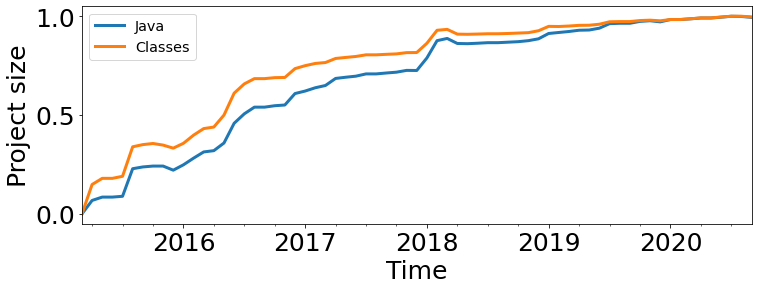

In [72]:
plotProjectSizeMetrics("projectSizeExample.pdf", androidMetrics["googlesamples/android-testdpc"])

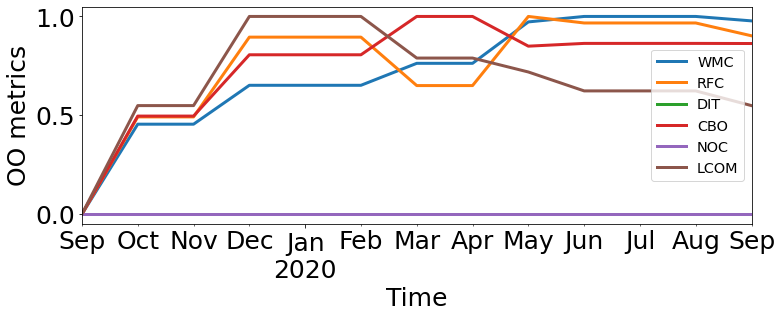

In [73]:
plotOOMetrics("ooMetricsExample.pdf", azureMetrics["Azure-Samples/Azure-Spring-Cloud-Samples"])

In [24]:
def plotSourceCodeMetrics(sample, dataset):
    subplot = dataset["PL"].plot(legend=True)
    subplot = dataset["LOC"].plot(legend=True)
    subplot = dataset["CLOC"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("Source code")
    subplot.set_title(f"Code size of {sample}")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}-source-code-size.jpg",bbox_inches = 'tight')    

In [25]:
def plotReadability(sample, dataset):
    subplot = dataset["Readability"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_title(f"Readability of {sample}")
    subplot.set_ylabel("Readability")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}-readability.jpg",bbox_inches = 'tight')

In [26]:
def plotProjectSizeMetrics(sample, dataset):
    subplot = dataset["Java"].plot(legend=True)
    subplot = dataset["Classes"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_title(f"Project size of {sample}")
    subplot.set_ylabel("Project size")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}-project-size.jpg",bbox_inches = 'tight')

In [27]:
def plotOOMetrics(sample, dataset):
    subplot = dataset["WMC"].plot(legend=True)     
    subplot = dataset["RFC"].plot(legend=True)
    subplot = dataset["DIT"].plot(legend=True)
    subplot = dataset["CBO"].plot(legend=True)
    subplot = dataset["NOC"].plot(legend=True)
    subplot = dataset["LCOM"].plot(legend=True)
    subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("OO metrics")
    subplot.set_title(f"OO metrics of {sample}")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/{sample}-oo-metrics.jpg",bbox_inches = 'tight')

In [29]:
def plotAllMetrics(dataset):
    for sample in dataset.keys():
        plotSourceCodeMetrics(sample, dataset[sample])
        plt.clf()
        plotReadability(sample, dataset[sample])
        plt.clf()
        plotProjectSizeMetrics(sample, dataset[sample])
        plt.clf()
        plotOOMetrics(sample, dataset[sample])
        plt.clf()


In [30]:
plotAllMetrics(androidMetrics)
plotAllMetrics(awsMetrics)
plotAllMetrics(azureMetrics)
plotAllMetrics(springMetrics)

<Figure size 864x288 with 0 Axes>

In [42]:
def printImgHtml(listSamples):
    for sample in listSamples.index.values:
        print(f"<img src='5-PlottingGraphics/1-CodeSamples/{sample}-source-code-size.jpg'>")
        print(f"<img src='5-PlottingGraphics/1-CodeSamples/{sample}-readability.jpg'>")
        print(f"<img src='5-PlottingGraphics/1-CodeSamples/{sample}-project-size.jpg'>")
        print(f"<img src='5-PlottingGraphics/1-CodeSamples/{sample}-oo-metrics.jpg'>")

In [43]:
printImgHtml(androidListSamples)

<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-AutofillFramework-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-AutofillFramework-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-AutofillFramework-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-AutofillFramework-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-play-location-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-play-location-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-play-location-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/android-play-location-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/google-services-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/googlesamples/google-services-readability.jpg'>
<img src='5

In [44]:
printImgHtml(springListSamples)

<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/tut-rest-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/tut-rest-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/tut-rest-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/tut-rest-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/gs-spring-boot-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/gs-spring-boot-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/gs-spring-boot-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/gs-spring-boot-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/gs-rest-service-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/gs-rest-service-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/spring-guides/gs-rest-service-project-size.jpg'>
<img src='5-Plo

In [45]:
printImgHtml(awsListSamples)

<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/amazon-kinesis-learning-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/amazon-kinesis-learning-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/amazon-kinesis-learning-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/amazon-kinesis-learning-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/alexa-web-information-service-api-samples-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/alexa-web-information-service-api-samples-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/alexa-web-information-service-api-samples-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/alexa-web-information-service-api-samples-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/aws-samples/aws-cognito-java-desktop-app-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-Code

In [46]:
printImgHtml(azureListSamples)

<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/Azure-Spring-Cloud-Samples-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/Azure-Spring-Cloud-Samples-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/Azure-Spring-Cloud-Samples-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/Azure-Spring-Cloud-Samples-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/ms-identity-java-webapp-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/ms-identity-java-webapp-readability.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/ms-identity-java-webapp-project-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/ms-identity-java-webapp-oo-metrics.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/azure-cosmos-db-cassandra-java-getting-started-source-code-size.jpg'>
<img src='5-PlottingGraphics/1-CodeSamples/Azure-Samples/az